In [952]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
import pickle

In [953]:
#read dataSet
df = pd.read_csv("train_Data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Display the number of value null for every colums

In [954]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
                     ..
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Length: 13, dtype: int64

In [955]:
#display the statistical value
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [956]:
#display the categories value
df.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [957]:
df.loc[0]

Loan_ID             LP001002
Gender                  Male
Married                   No
Dependents                 0
Education           Graduate
                      ...   
LoanAmount               NaN
Loan_Amount_Term       360.0
Credit_History           1.0
Property_Area          Urban
Loan_Status                Y
Name: 0, Length: 13, dtype: object

In [958]:
#separte data to numeric dataFrame and object
obj_data= []
num_data= []

for index, type in enumerate(df.dtypes):
    if type== object :
        obj_data.append(df.iloc[:,index])
    else:
        num_data.append(df.iloc[:,index])

obj_data= pd.DataFrame(obj_data).transpose()
num_data= pd.DataFrame(num_data).transpose()

In [959]:
obj_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [960]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


For the obj_data (Categorical dataSets) we will replace the misssing value with the value are repeated several times

In [961]:
obj_data= obj_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [962]:
obj_data.isnull().sum().any()

False

For the num_data (Numerical dataSets) we will replace the misssing value with previous values

In [963]:
num_data= num_data.fillna(method="bfill")

In [964]:
num_data.isnull().sum().any()

False

In [965]:
df.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [966]:
#transform colum target using Loaning_Status
target_value={"Y":1, "N":0}
target= obj_data['Loan_Status']

target= target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [967]:
#drop traget colum from obj_data
obj_data.drop('Loan_Status',axis=1, inplace=True)
obj_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001002,Male,No,0,Graduate,No,Urban
1,LP001003,Male,Yes,1,Graduate,No,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,Urban
4,LP001008,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural
610,LP002979,Male,Yes,3+,Graduate,No,Rural
611,LP002983,Male,Yes,1,Graduate,No,Urban
612,LP002984,Male,Yes,2,Graduate,No,Urban


In [968]:
#transform categorical data to numerical value 1, 2, 3....
le=LabelEncoder()
for i in obj_data:
    obj_data[i]=le.fit_transform(obj_data[i])
    
   
obj_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [969]:
#Drop Load_id from obj_data
obj_data= obj_data.drop('Loan_ID', axis=1)
obj_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2
...,...,...,...,...,...,...
609,0,0,0,0,0,0
610,1,1,3,0,0,0
611,1,1,1,0,0,2
612,1,1,2,0,0,2


In [970]:
#Concatinate obj_data and num_data

X=pd.concat([obj_data, num_data],axis=1)

y=target


# End cleaning Data -----------------------------------

In [971]:
#dataSets for EDA : exploration data analysis
df=pd.concat([num_data,obj_data,target], axis=1)

In [972]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.0,0.0,128.0,360.0,1.0,1,0,0,0,0,2,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,1,2,1
3,2583.0,2358.0,120.0,360.0,1.0,1,1,0,1,0,2,1
4,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,0,0,0,0,0,0,1
610,4106.0,0.0,40.0,180.0,1.0,1,1,3,0,0,0,1
611,8072.0,240.0,253.0,360.0,1.0,1,1,1,0,0,2,1
612,7583.0,0.0,187.0,360.0,1.0,1,1,2,0,0,2,1


In [973]:
target.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

the mean of Yes loan is : 0.6872964169381107
the mean of No loan is : 0.3127035830618892


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


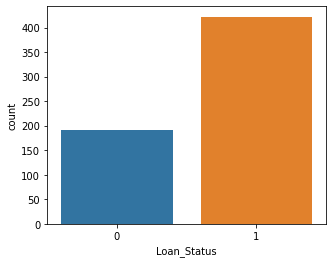

In [974]:
plt.figure(figsize=(5,4))
sns.countplot(target)

yes=len((target[target==1]))/len(target)
no=len((target[target==0]))/len(target)

print(f'the mean of Yes loan is : {yes}')
print(f'the mean of No loan is : {no}')

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


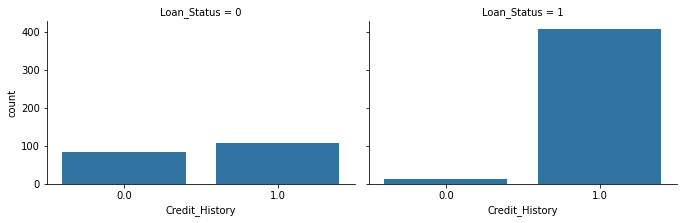

In [975]:
#show relation between accepted Loan && Credit_History
grid= sns.FacetGrid(df, col="Loan_Status", size=3.2, aspect=1.5)
grid.map(sns.countplot, 'Credit_History')

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


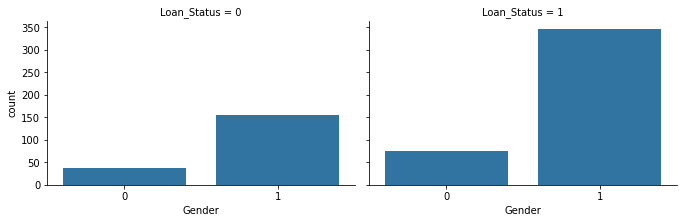

In [976]:
#show relation between accepted Loan && Gender
grid= sns.FacetGrid(df, col="Loan_Status", size=3.2, aspect=1.5)
grid.map(sns.countplot, 'Gender')

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


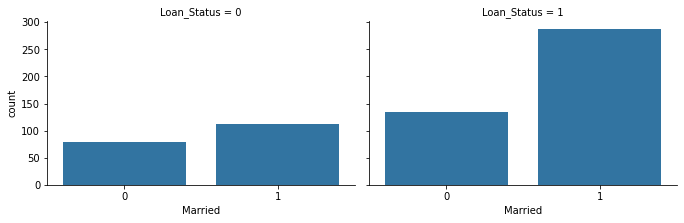

In [977]:
#show relation between accepted Loan && Married
grid= sns.FacetGrid(df, col="Loan_Status", size=3.2, aspect=1.5)
grid.map(sns.countplot, 'Married')

Text(0, 0.5, 'Loan Status')

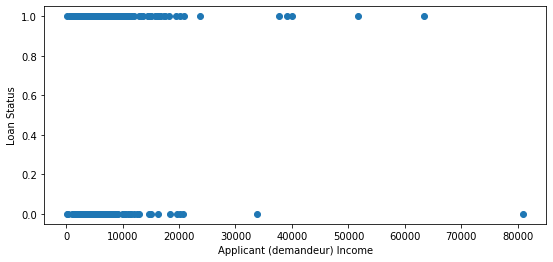

In [978]:
#loan applicant income
plt.figure(figsize=(9,4))
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])
plt.xlabel("Applicant (demandeur) Income")
plt.ylabel("Loan Status")

# Building Model ML ------------------

In [979]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [980]:
#devide dataSets to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Size of X_train : ",X_train.shape)
print("Size of X_test : ",X_test.shape)
print("Size of X_train : ",y_train.shape)
print("Size of y_test : ",y_test.shape)

Size of X_train :  (491, 11)
Size of X_test :  (123, 11)
Size of X_train :  (491,)
Size of y_test :  (123,)


In [981]:
# we will apply tree type of model of ML
models={
    'LinearRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1, random_state=42)
}

#--------------------------------------------
#create function of precision
def accur(y_true, y_pred, retu=False):
    acc=accuracy_score(y_true, y_pred)
    if retu:
        return acc
    else:
        print("The precision of this model is : ", acc)

#--------------------------------------------
#Create the function of applying the models
def train_tes_eval(models,X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(name, ':')
        model.fit(X_train, y_train)
        accur(y_test, model.predict(X_test))
        print('-'*45)

#--------------------------------------------
train_tes_eval(models,X_train, y_train, X_test, y_test)

LinearRegression :
The precision of this model is :  0.7967479674796748
---------------------------------------------
KNeighborsClassifier :
The precision of this model is :  0.5772357723577236
---------------------------------------------
DecisionTreeClassifier :
The precision of this model is :  0.7967479674796748
---------------------------------------------


======> we see that the model LinearRegression and DecisionTreeClassifier has a better accuracy